# Exploratory Data Analysis (EDA) for Hospital Readmissions

This notebook performs an exploratory data analysis on the hospital readmission dataset. The goal is to uncover patterns, trends, and insights related to patient readmissions.

## 1. Setup and Data Loading

Import necessary libraries and load the enriched admissions data.

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import sys
import os

# Add the project root to sys.path to allow importing from src
# Assuming the notebook is in 'notebooks/' and 'src/' is at the same level as 'notebooks/'
# When running in a Jupyter Notebook, __file__ is not defined. Use os.getcwd() instead.
# os.getcwd() will give the path to the 'notebooks' directory if the notebook is run from there.
current_notebook_dir = os.getcwd()
project_root = os.path.abspath(os.path.join(current_notebook_dir, '..'))

if project_root not in sys.path:
    sys.path.insert(0, project_root)
    print(f"Added {project_root} to sys.path")

from src.analysis.data_enrichment import get_enriched_admissions

# Load the data
print("Attempting to load enriched admissions data...")
df = get_enriched_admissions()

# Display a sample of the data
if not df.empty:
    print("Data loaded successfully. Shape: ", df.shape)
    display(df.head())
else:
    print("Dataframe is empty. Please check the data loading process, database connection, and ensure the PostgreSQL server is running and data is populated.")

Added c:\Users\loverobrands\Documents\DataAnalytics\Projects\Hospital_Readmission to sys.path
Attempting to load enriched admissions data...
Executing enrichment query...
Successfully retrieved 38 enriched admission records.
Data loaded successfully. Shape:  (38, 14)


,admission_id,patient_id,patient_name,gender,age,admission_date,discharge_date,length_of_stay,readmitted,doctor_id,doctor_name,specialty,diagnosis_code,description
0,1,1,Stephanie Carter,Female,37.0,2023-01-10,2023-01-15,5,False,3.0,Angela Cohen,Oncology,C50,Great in tell approach.
1,1,1,Stephanie Carter,Female,37.0,2023-01-10,2023-01-15,5,False,3.0,Angela Cohen,Oncology,C50,Sense ready require human public.
2,6,6,Jacob Reid,Male,82.0,2023-04-01,2023-04-08,7,False,14.0,Reginald Robinson,Pulmonology,F32,Eat couple.
3,6,6,Jacob Reid,Male,82.0,2023-04-01,2023-04-08,7,False,14.0,Reginald Robinson,Pulmonology,I21,Office drug list imagine behind.
4,6,6,Jacob Reid,Male,82.0,2023-04-01,2023-04-08,7,False,14.0,Reginald Robinson,Pulmonology,C50,Truth out major born guy.


## 2. EDA Visualizations

Generate various plots to understand the data better. All plots will be saved to the `../reports/figures/` directory relative to the notebook's location (i.e., `Hospital_Readmission/reports/figures/`).

### A. Readmission Rate by Age Group

Generating Readmission Rate by Age Group plot...


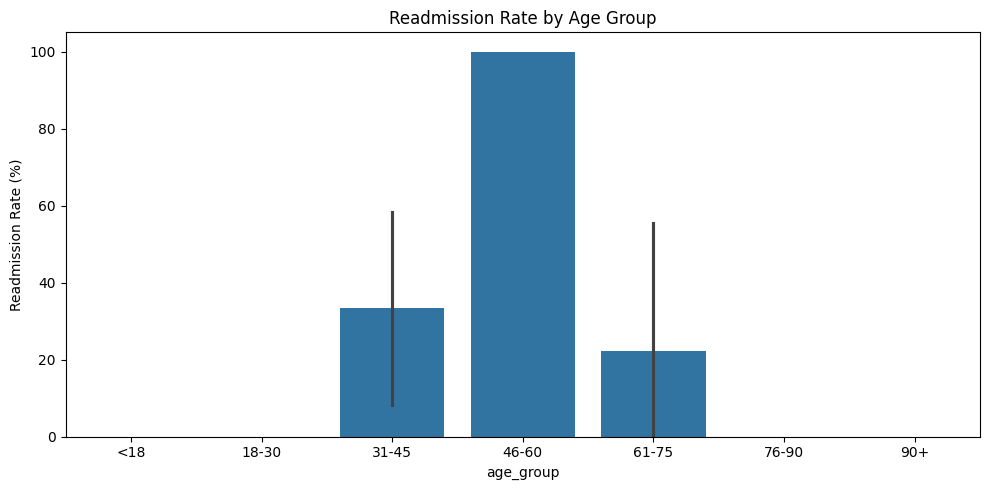

Plot 'eda_readmission_by_age_group.png' saved to c:\Users\loverobrands\Documents\DataAnalytics\Projects\Hospital_Readmission\reports\figures


In [2]:
if not df.empty and 'age' in df.columns and 'readmitted' in df.columns:
    print("Generating Readmission Rate by Age Group plot...")
    bins = [0, 18, 30, 45, 60, 75, 90, 120]
    labels = ['<18', '18-30', '31-45', '46-60', '61-75', '76-90', '90+']
    df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)
    
    plt.figure(figsize=(10, 5))
    sns.barplot(data=df, x='age_group', y='readmitted', estimator=lambda x: sum(x) / len(x) * 100 if len(x) > 0 else 0)
    plt.ylabel("Readmission Rate (%)")
    plt.title("Readmission Rate by Age Group")
    plt.tight_layout()
    # Ensure the reports/figures directory exists
    os.makedirs(os.path.join(project_root, 'reports', 'figures'), exist_ok=True)
    plt.savefig(os.path.join(project_root, 'reports', 'figures', 'eda_readmission_by_age_group.png'))
    plt.show()
    plt.close()
    print(f"Plot 'eda_readmission_by_age_group.png' saved to {os.path.join(project_root, 'reports', 'figures')}")
else:
    print("Skipping 'Readmission Rate by Age Group' plot due to missing columns ('age', 'readmitted') or empty dataframe.")

### B. Readmission Rate by Gender

Generating Readmission Rate by Gender plot...


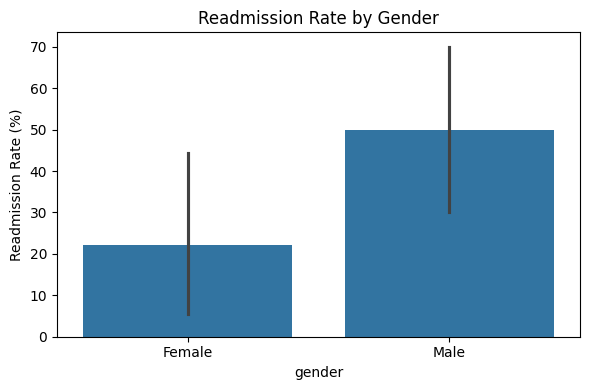

Plot 'eda_readmission_by_gender.png' saved to c:\Users\loverobrands\Documents\DataAnalytics\Projects\Hospital_Readmission\reports\figures


In [3]:
if not df.empty and 'gender' in df.columns and 'readmitted' in df.columns:
    print("Generating Readmission Rate by Gender plot...")
    plt.figure(figsize=(6, 4))
    sns.barplot(data=df, x='gender', y='readmitted', estimator=lambda x: sum(x) / len(x) * 100 if len(x) > 0 else 0)
    plt.ylabel("Readmission Rate (%)")
    plt.title("Readmission Rate by Gender")
    plt.tight_layout()
    os.makedirs(os.path.join(project_root, 'reports', 'figures'), exist_ok=True)
    plt.savefig(os.path.join(project_root, 'reports', 'figures', 'eda_readmission_by_gender.png'))
    plt.show()
    plt.close()
    print(f"Plot 'eda_readmission_by_gender.png' saved to {os.path.join(project_root, 'reports', 'figures')}")
else:
    print("Skipping 'Readmission Rate by Gender' plot due to missing columns ('gender', 'readmitted') or empty dataframe.")

### C. Length of Stay vs Readmission

Generating Length of Stay vs Readmission plot...


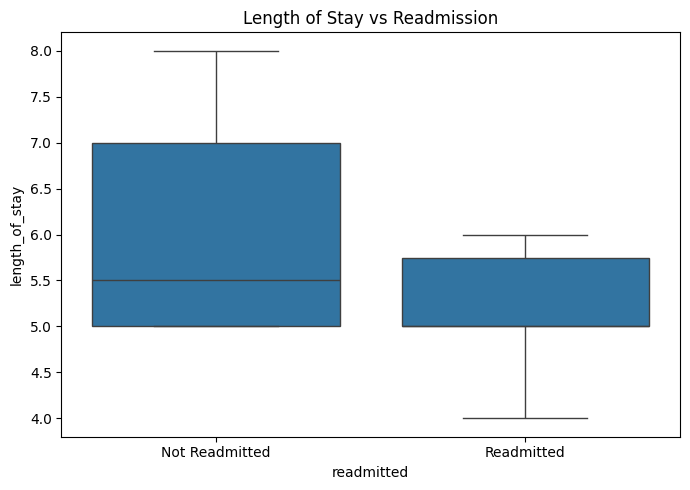

Plot 'eda_los_vs_readmission.png' saved to c:\Users\loverobrands\Documents\DataAnalytics\Projects\Hospital_Readmission\reports\figures


In [4]:
if not df.empty and 'readmitted' in df.columns and 'length_of_stay' in df.columns:
    print("Generating Length of Stay vs Readmission plot...")
    plt.figure(figsize=(7, 5))
    sns.boxplot(data=df, x='readmitted', y='length_of_stay')
    plt.xticks([False, True], ['Not Readmitted', 'Readmitted']) # Assuming readmitted is boolean
    plt.title("Length of Stay vs Readmission")
    plt.tight_layout()
    os.makedirs(os.path.join(project_root, 'reports', 'figures'), exist_ok=True)
    plt.savefig(os.path.join(project_root, 'reports', 'figures', 'eda_los_vs_readmission.png'))
    plt.show()
    plt.close()
    print(f"Plot 'eda_los_vs_readmission.png' saved to {os.path.join(project_root, 'reports', 'figures')}")
else:
    print("Skipping 'Length of Stay vs Readmission' plot due to missing columns ('readmitted', 'length_of_stay') or empty dataframe.")

### D. Seasonal Admissions Trend

Generating Seasonal Admissions Trend plot...


C:\Users\loverobrands\AppData\Local\Temp\ipykernel_10828\1617594587.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  month_order = pd.date_range('2023-01-01', periods=12, freq='M').strftime('%B')
C:\Users\loverobrands\AppData\Local\Temp\ipykernel_10828\1617594587.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='admission_month_name', order=month_order, palette='viridis')


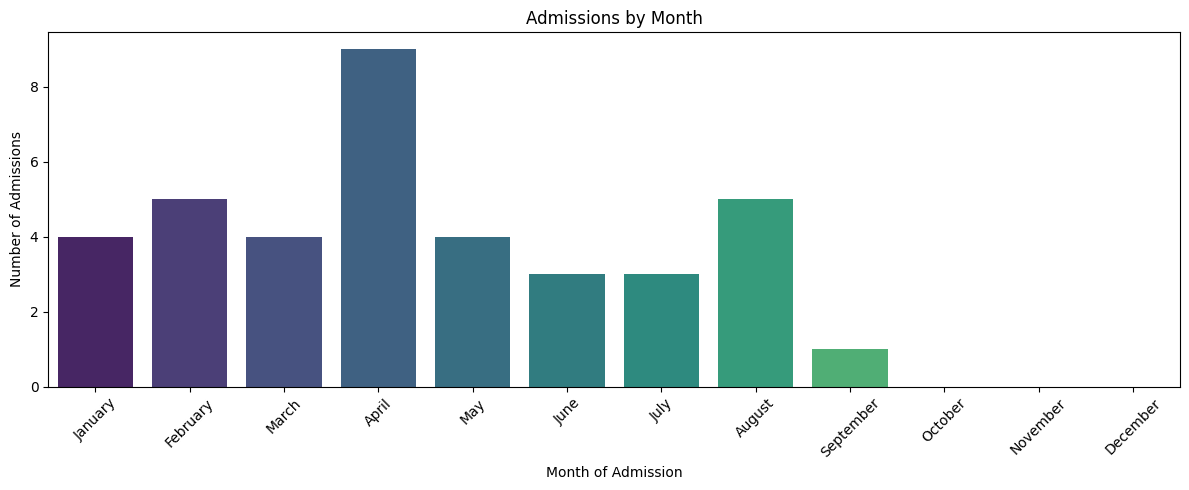

Plot 'eda_admissions_by_month.png' saved to c:\Users\loverobrands\Documents\DataAnalytics\Projects\Hospital_Readmission\reports\figures


In [5]:
if not df.empty and 'admission_date' in df.columns:
    print("Generating Seasonal Admissions Trend plot...")
    df['admission_month_name'] = pd.to_datetime(df['admission_date']).dt.month_name()
    month_order = pd.date_range('2023-01-01', periods=12, freq='M').strftime('%B')
    
    plt.figure(figsize=(12, 5))
    sns.countplot(data=df, x='admission_month_name', order=month_order, palette='viridis')
    plt.title("Admissions by Month")
    plt.xlabel("Month of Admission")
    plt.ylabel("Number of Admissions")
    plt.xticks(rotation=45)
    plt.tight_layout()
    os.makedirs(os.path.join(project_root, 'reports', 'figures'), exist_ok=True)
    plt.savefig(os.path.join(project_root, 'reports', 'figures', 'eda_admissions_by_month.png'))
    plt.show()
    plt.close()
    print(f"Plot 'eda_admissions_by_month.png' saved to {os.path.join(project_root, 'reports', 'figures')}")
else:
    print("Skipping 'Seasonal Admissions Trend' plot due to missing column ('admission_date') or empty dataframe.")

### E. Readmission Rate by Doctor Specialty (Top 5 Specialties)

Generating Readmission Rate by Doctor Specialty plot...


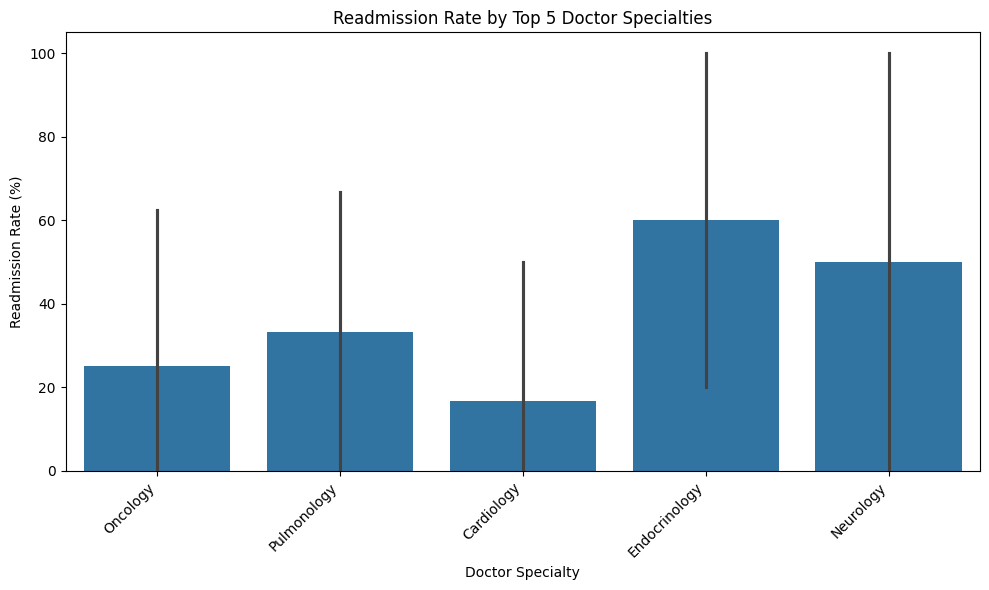

Plot 'eda_readmission_by_specialty.png' saved to c:\Users\loverobrands\Documents\DataAnalytics\Projects\Hospital_Readmission\reports\figures


In [6]:
if not df.empty and 'specialty' in df.columns and 'readmitted' in df.columns:
    print("Generating Readmission Rate by Doctor Specialty plot...")
    if df['specialty'].notna().any():
        top_specialties = df['specialty'].value_counts().nlargest(5).index
        df_top_specialties = df[df['specialty'].isin(top_specialties)]
        
        if not df_top_specialties.empty:
            plt.figure(figsize=(10, 6))
            sns.barplot(data=df_top_specialties, x='specialty', y='readmitted', order=top_specialties, estimator=lambda x: sum(x) / len(x) * 100 if len(x) > 0 else 0)
            plt.title("Readmission Rate by Top 5 Doctor Specialties")
            plt.ylabel("Readmission Rate (%)")
            plt.xlabel("Doctor Specialty")
            plt.xticks(rotation=45, ha='right')
            plt.tight_layout()
            os.makedirs(os.path.join(project_root, 'reports', 'figures'), exist_ok=True)
            plt.savefig(os.path.join(project_root, 'reports', 'figures', 'eda_readmission_by_specialty.png'))
            plt.show()
            plt.close()
            print(f"Plot 'eda_readmission_by_specialty.png' saved to {os.path.join(project_root, 'reports', 'figures')}")
        else:
            print("No data available for top specialties. Skipping 'Readmission Rate by Doctor Specialty' plot.")
    else:
        print("Specialty column contains all NaN values. Skipping 'Readmission Rate by Doctor Specialty' plot.")
else:
    print("Skipping 'Readmission Rate by Doctor Specialty' plot due to missing columns ('specialty', 'readmitted') or empty dataframe.")

## 3. Conclusion

The EDA process is complete. All generated plots have been saved to the `reports/figures/` directory. These visualizations provide initial insights into factors potentially associated with hospital readmissions.